https://www.kaggle.com/c/covid19-global-forecasting-week-1

In this challenge, you will be predicting the cumulative number of confirmed COVID19 cases in various locations across the world, as well as the number of resulting fatalities, for future dates.

We understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities. Our goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold.

In [1]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
!cd data && ls

submission.csv test.csv       train.csv


<IPython.core.display.Javascript object>

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

<IPython.core.display.Javascript object>

In [5]:
train.head().T

0            1            2            3  \
Id                        1            2            3            4   
Province/State          NaN          NaN          NaN          NaN   
Country/Region  Afghanistan  Afghanistan  Afghanistan  Afghanistan   
Lat                      33           33           33           33   
Long                     65           65           65           65   
Date             2020-01-22   2020-01-23   2020-01-24   2020-01-25   
ConfirmedCases            0            0            0            0   
Fatalities                0            0            0            0   

                          4  
Id                        5  
Province/State          NaN  
Country/Region  Afghanistan  
Lat                      33  
Long                     65  
Date             2020-01-26  
ConfirmedCases            0  
Fatalities                0

<IPython.core.display.Javascript object>

In [6]:
test.head().T

0            1            2            3  \
ForecastId                1            2            3            4   
Province/State          NaN          NaN          NaN          NaN   
Country/Region  Afghanistan  Afghanistan  Afghanistan  Afghanistan   
Lat                      33           33           33           33   
Long                     65           65           65           65   
Date             2020-03-12   2020-03-13   2020-03-14   2020-03-15   

                          4  
ForecastId                5  
Province/State          NaN  
Country/Region  Afghanistan  
Lat                      33  
Long                     65  
Date             2020-03-16

<IPython.core.display.Javascript object>

In [9]:
train.isna().mean().round(4)

Id                0.0
Province/State    0.0
Country/Region    0.0
Lat               0.0
Long              0.0
Date              0.0
ConfirmedCases    0.0
Fatalities        0.0
dtype: float64

<IPython.core.display.Javascript object>

In [8]:
train["Province/State"].fillna("Unknown", inplace=True)
train["Lat"].fillna(-999, inplace=True)
train["Long"].fillna(-999, inplace=True)

<IPython.core.display.Javascript object>

Grouping by country and date and aggregating data.

In [10]:
data = (
    train.groupby(["Date", "Country/Region"])
    .agg({"ConfirmedCases": "sum", "Fatalities": "sum"})
    .reset_index()
)

<IPython.core.display.Javascript object>

In [11]:
data

Date       Country/Region  ConfirmedCases  Fatalities
0     2020-01-22          Afghanistan             0.0         0.0
1     2020-01-22              Albania             0.0         0.0
2     2020-01-22              Algeria             0.0         0.0
3     2020-01-22              Andorra             0.0         0.0
4     2020-01-22  Antigua and Barbuda             0.0         0.0
...          ...                  ...             ...         ...
9612  2020-03-20              Uruguay            94.0         0.0
9613  2020-03-20           Uzbekistan            33.0         0.0
9614  2020-03-20            Venezuela            42.0         0.0
9615  2020-03-20              Vietnam            91.0         0.0
9616  2020-03-20               Zambia             2.0         0.0

[9617 rows x 4 columns]

<IPython.core.display.Javascript object>

In [12]:
test_data = (
    test.groupby(["Date", "Country/Region"])
    .last()
    .reset_index()[["Date", "Country/Region"]]
)

<IPython.core.display.Javascript object>

In [13]:
test_data

Date       Country/Region
0     2020-03-12          Afghanistan
1     2020-03-12              Albania
2     2020-03-12              Algeria
3     2020-03-12              Andorra
4     2020-03-12  Antigua and Barbuda
...          ...                  ...
7004  2020-04-23              Uruguay
7005  2020-04-23           Uzbekistan
7006  2020-04-23            Venezuela
7007  2020-04-23              Vietnam
7008  2020-04-23               Zambia

[7009 rows x 2 columns]

<IPython.core.display.Javascript object>

In [14]:
data["Date"] = pd.to_datetime(data.Date)
test_data["Date"] = pd.to_datetime(test_data.Date)

<IPython.core.display.Javascript object>

In [15]:
print(f"Data Last Date: {data.Date.max()}")
print(f"Test Data First Date: {test_data.Date.min()}")

Data Last Date: 2020-03-20 00:00:00
Test Data First Date: 2020-03-12 00:00:00


<IPython.core.display.Javascript object>

In [16]:
countries = data["Country/Region"].unique()
test_countries = test_data["Country/Region"].unique()

<IPython.core.display.Javascript object>

In [17]:
set(countries) == set(test_countries)

True

<IPython.core.display.Javascript object>

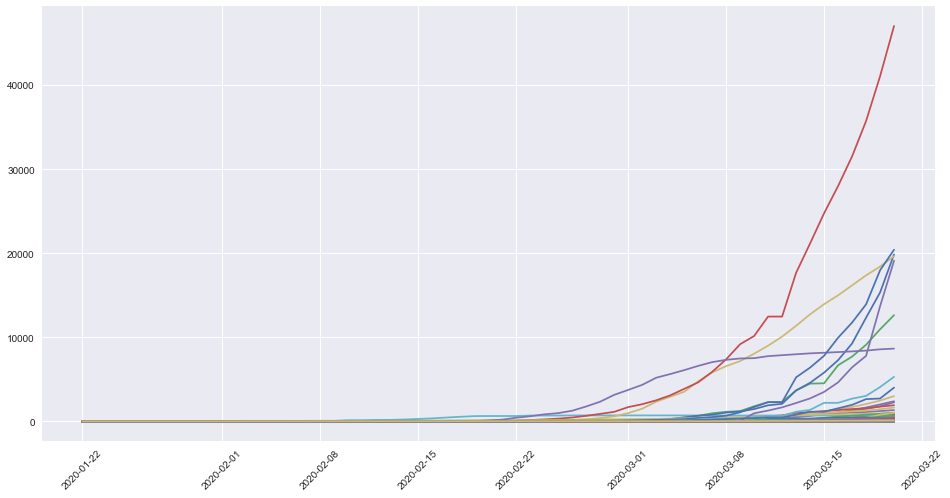

<IPython.core.display.Javascript object>

In [18]:
plt.figure(1, figsize=(16, 8))

for i in range(1, len(countries)):
    _data = data[data["Country/Region"] == countries[i - 1]]
    plt.xticks(rotation=45)
    if countries[i - 1] != "China":
        plt.plot(_data.Date, _data.ConfirmedCases)

### Check confirmed cases and fatalities per country.

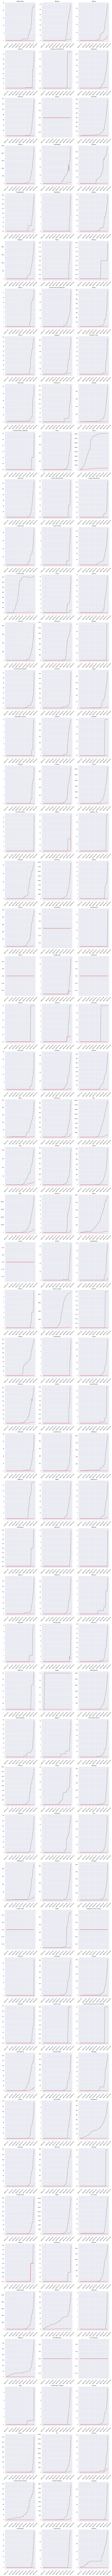

<IPython.core.display.Javascript object>

In [19]:
plt.figure(1, figsize=(16, 16 * 8))

for i in range(1, len(countries)):
    _data = data[data["Country/Region"] == countries[i - 1]]
    plt.subplots_adjust(top=2.5)
    plt.subplot(54, 3, i)
    plt.xticks(rotation=45)
    plt.title(countries[i - 1])
    plt.plot(_data.Date, _data.ConfirmedCases, color="grey")
    plt.plot(_data.Date, _data.Fatalities, color="r", alpha=0.7)

### Calculate the mortality rate.

Let's combine all the data to calculate the total number of cases and fatalities per country and calculate the mortality rate.

In [20]:
comb_data = data.groupby("Country/Region").agg(
    {"ConfirmedCases": "sum", "Fatalities": "sum"}
)

<IPython.core.display.Javascript object>

Choosing to filter by at least 1000 confirmed cases. As many countries have few confirmed cases, a mortality rate calculated on those wouldn't be representative.

In [21]:
comb_data = comb_data[comb_data.ConfirmedCases > 1000]
comb_data["FatalityPerc"] = 100 * comb_data.Fatalities / comb_data.ConfirmedCases

<IPython.core.display.Javascript object>

In [22]:
mortality_rate = comb_data.FatalityPerc.sort_values(ascending=False)
print(mortality_rate)

Country/Region
Philippines             9.137380
Iraq                    7.709623
Italy                   7.254719
San Marino              6.486043
Indonesia               6.253832
Iran                    5.232312
Spain                   4.064285
China                   3.334745
United Kingdom          3.104566
Lebanon                 2.532617
Japan                   2.328796
Netherlands             2.326887
France                  2.261706
Egypt                   2.139965
Taiwan*                 1.891892
Poland                  1.758125
US                      1.582783
India                   1.517911
Australia               1.240993
Greece                  1.060383
Luxembourg              0.979021
Canada                  0.921942
Belgium                 0.888357
Switzerland             0.867919
Korea, South            0.794940
Ireland                 0.764588
Brazil                  0.704225
Cruise Ship             0.684875
Thailand                0.661157
Sweden                  0.48

<IPython.core.display.Javascript object>

In [23]:
print(f"Median mortality rate: {mortality_rate.median()}")

Median mortality rate: 0.704225352112676


<IPython.core.display.Javascript object>

Remove overlap between train and test set

In [24]:
print(f"Data Last Date: {data.Date.max()}")
print(f"Test Data First Date: {test_data.Date.min()}")

Data Last Date: 2020-03-20 00:00:00
Test Data First Date: 2020-03-12 00:00:00


<IPython.core.display.Javascript object>

In [26]:
valid = data[data.Date >= min(test_data.Date)]
train = data[data.Date < min(test_data.Date)]

<IPython.core.display.Javascript object>

### Predict number of confirmed cases per country.

In [27]:
test_data["ConfirmedCases"] = np.nan
test_data["Fatalities"] = np.nan

<IPython.core.display.Javascript object>

In [28]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [29]:
for country in countries:
    _train = train[train["Country/Region"] == country]
    _test = test_data[test_data["Country/Region"] == country]
    confirmed = _train["ConfirmedCases"].values[-10:]
    fatalities = _train["Fatalities"].values[-10:]
    if np.sum(confirmed) > 0:
        X = np.arange(len(confirmed)).reshape(-1, 1)
        X_test = len(confirmed) + np.arange(len(_test)).reshape(-1, 1)

        model = LinearRegression()
        model.fit(X, confirmed)

        conf = model.predict(X_test)
        conf = np.clip(conf, 0, None)
        conf = conf - np.min(conf) + confirmed[-1]
        conf = np.ceil(conf)
        test_data.loc[test_data["Country/Region"] == country, "ConfirmedCases"] = conf

        model = LinearRegression()
        model.fit(X, fatalities)

        fatal = model.predict(X_test)
        fatal = np.clip(fatal, 0, None)
        fatal = fatal - np.min(fatal) + fatalities[-1]
        fatal = np.ceil(fatal)
        test_data.loc[test_data["Country/Region"] == country, "Fatalities"] = fatal

test_data[["ConfirmedCases", "Fatalities"]].fillna(0, inplace=True)

/Users/radufotolescu/.local/share/virtualenvs/useful-jAUW_uHU/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<IPython.core.display.Javascript object>

Let's evaluate the predictions by plotting the overlapping data.


In [30]:
valid.sort_values(["Country/Region", "Date"], inplace=True)
preds = test_data.sort_values(["Country/Region", "Date"])

preds = preds.copy()
valid = valid.copy()
preds = valid[["Country/Region", "Date"]].merge(
    preds, on=["Country/Region", "Date"], how="left"
)
preds.fillna(0, inplace=True)

/Users/radufotolescu/.local/share/virtualenvs/useful-jAUW_uHU/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [31]:
valid["PredictedConfirmedCases"] = preds.ConfirmedCases.values
valid["PredictedFatalities"] = preds.Fatalities.values

<IPython.core.display.Javascript object>

In [32]:
valid

Date Country/Region  ConfirmedCases  Fatalities  \
8150 2020-03-12    Afghanistan             7.0         0.0   
8313 2020-03-13    Afghanistan             7.0         0.0   
8476 2020-03-14    Afghanistan            11.0         0.0   
8639 2020-03-15    Afghanistan            16.0         0.0   
8802 2020-03-16    Afghanistan            21.0         0.0   
...         ...            ...             ...         ...   
8964 2020-03-16         Zambia             0.0         0.0   
9127 2020-03-17         Zambia             0.0         0.0   
9290 2020-03-18         Zambia             2.0         0.0   
9453 2020-03-19         Zambia             2.0         0.0   
9616 2020-03-20         Zambia             2.0         0.0   

      PredictedConfirmedCases  PredictedFatalities  
8150                      7.0                  0.0  
8313                      8.0                  0.0  
8476                      9.0                  0.0  
8639                      9.0                  0.0  
8802                     10.0                  0.0  
...                       ...                  ...  
8964                      0.0                  0.0  
9127                      0.0                  0.0  
9290                      0.0                  0.0  
9453                      0.0                  0.0  
9616                      0.0                  0.0  

[1467 rows x 6 columns]

<IPython.core.display.Javascript object>

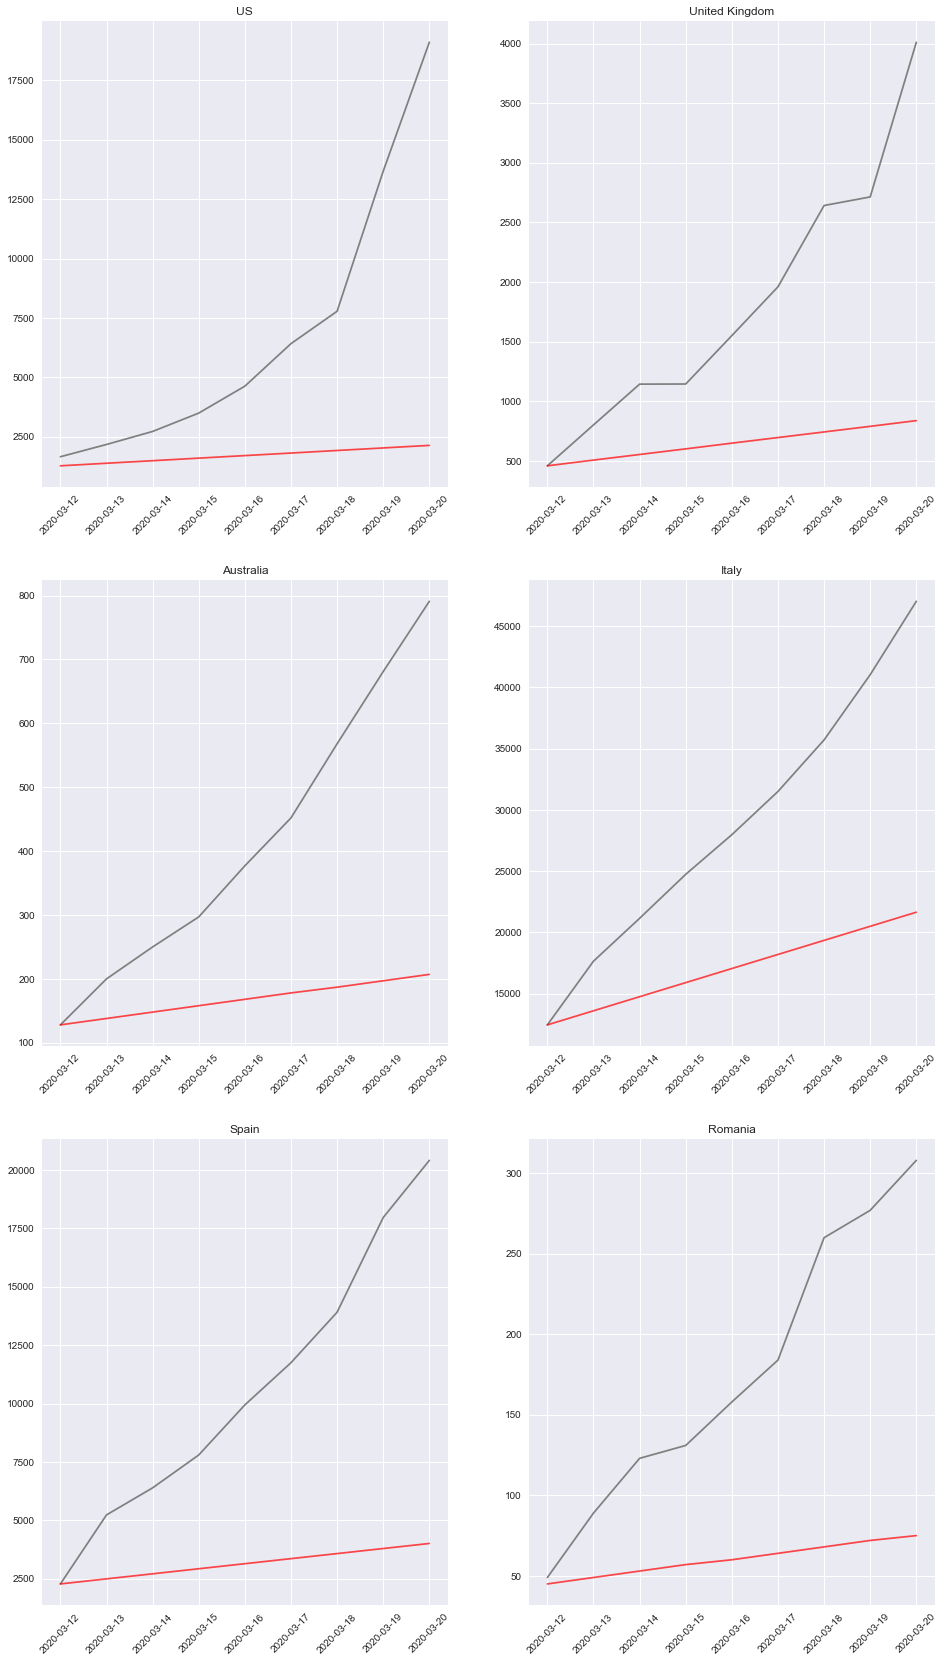

<IPython.core.display.Javascript object>

In [33]:
country_subset = ["US", "United Kingdom", "Australia", "Italy", "Spain", "Romania"]
plt.figure(2, figsize=(16, 16))
for i in range(len(country_subset)):
    _data = valid[valid["Country/Region"] == country_subset[i]]
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=1.5)
    plt.xticks(rotation=45)
    plt.title(country_subset[i])
    plt.plot(_data.Date, _data.ConfirmedCases, color="grey")
    plt.plot(_data.Date, _data.PredictedConfirmedCases, color="r", alpha=0.7)

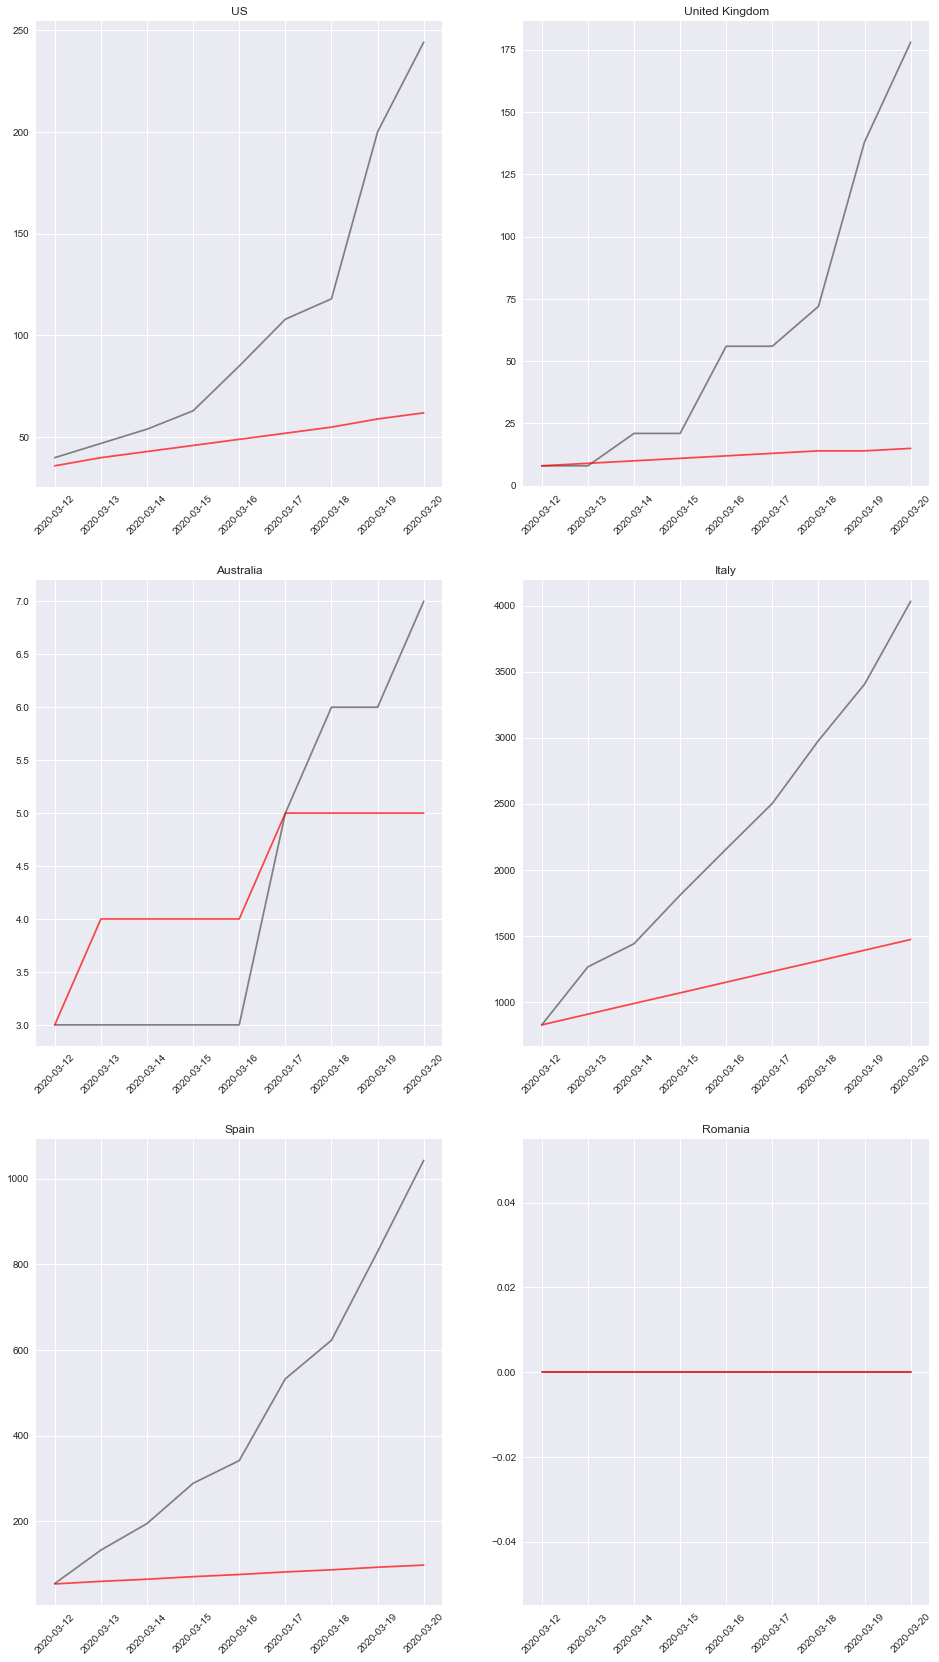

<IPython.core.display.Javascript object>

In [34]:
plt.figure(2, figsize=(16, 16))
for i in range(len(country_subset)):
    _data = valid[valid["Country/Region"] == country_subset[i]]
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=1.5)
    plt.xticks(rotation=45)
    plt.title(country_subset[i])
    plt.plot(_data.Date, _data.Fatalities, color="grey")
    plt.plot(_data.Date, _data.PredictedFatalities, color="r", alpha=0.7)